In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

In [15]:
df=pd.read_csv("/content/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
df.shape

(1460, 81)

In [17]:
df['SalePrice'].value_counts()

,count
SalePrice,
140000,20
135000,17
145000,14
155000,14
190000,13
...,...
223000,1
257000,1
282922,1


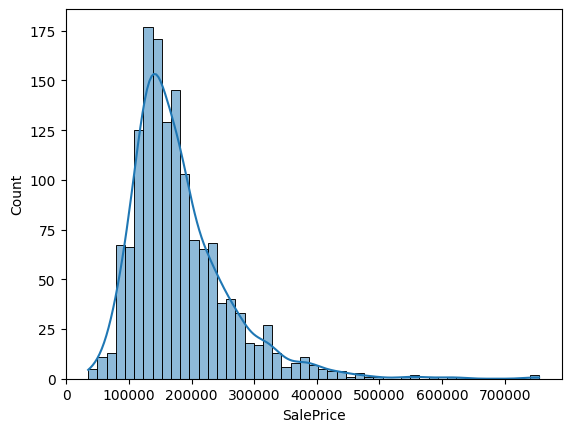

In [18]:
sns.histplot(df['SalePrice'], kde=True)
plt.show()

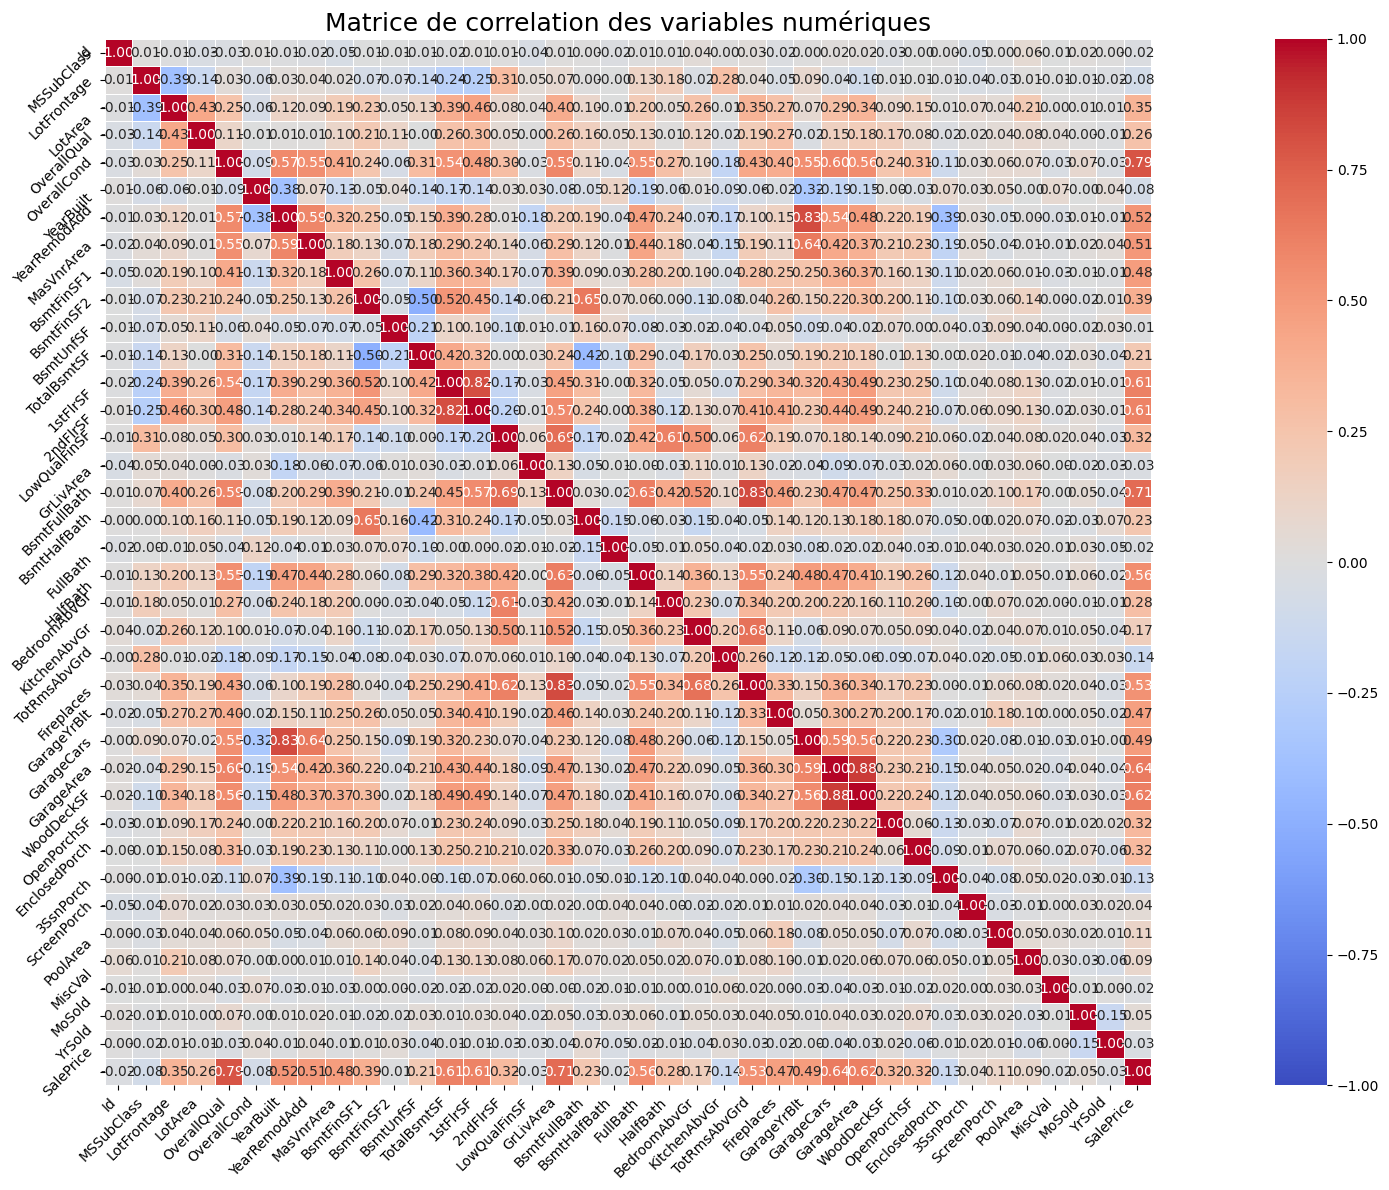

In [19]:
correlation_matrix =df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmax=1.0, vmin=-1.0,
            square=True, linewidths=0.5)
plt.title('Matrice de correlation des variables numériques', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)
df_clean= df.drop(columns=to_drop)

print("Dropped columns:", to_drop)

Dropped columns: {'1stFlrSF', 'GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt'}


In [33]:
df_clean.corrwith(df_clean['SalePrice'], numeric_only=True).abs().sort_values(ascending=False)

,0
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
TotalBsmtSF,0.613581
FullBath,0.560664
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.477493
Fireplaces,0.466929


In [34]:
df_clean.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [38]:
data = df_clean[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
                'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces','BsmtFinSF1']]

In [39]:
print(f"Mavjud bo'lmagan qiymatlar soni: {data.isnull().sum().sum()}")
missing_rows = data[data.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rows/len(data)*100)}%")

Mavjud bo'lmagan qiymatlar soni: 8
Mavjud bo'lmagan qatorlar soni: 8
Mavjud bo'lmagan qatorlar %: 1.0%


In [40]:
data=data.dropna()

In [41]:
data.shape

(1452, 11)

In [44]:
selected_columns = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    'FullBath',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'Fireplaces',
    'BsmtFinSF1',
    'LotFrontage',
    'WoodDeckSF',
    '2ndFlrSF',
    'OpenPorchSF',
    'HalfBath',
    'LotArea'
]

df_selected = df_clean[selected_columns]

print(df_selected.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0     208500            7       1710           2          856         2   
1     181500            6       1262           2         1262         2   
2     223500            7       1786           2          920         2   
3     140000            7       1717           3          756         1   
4     250000            8       2198           3         1145         2   

   YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  BsmtFinSF1  LotFrontage  \
0       2003          2003       196.0           0         706         65.0   
1       1976          1976         0.0           1         978         80.0   
2       2001          2002       162.0           1         486         68.0   
3       1915          1970         0.0           1         216         60.0   
4       2000          2000       350.0           1         655         84.0   

   WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  
0           0   

In [45]:
print(f"Mavjud bo'lmagan qiymatlar soni: {df_selected.isnull().sum().sum()}")
missing_rows = df_selected[df_selected.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rows}")
if len(df_selected) > 0:
    missing_rows_percentage = np.round((missing_rows / len(df_selected)) * 100)
    print(f"Mavjud bo'lmagan qatorlar %: {missing_rows_percentage}%")
else:
    print("DataFrame bo'sh, shuning uchun qatorlar foizini hisoblash imkoni yo'q.")

Mavjud bo'lmagan qiymatlar soni: 267
Mavjud bo'lmagan qatorlar soni: 265
Mavjud bo'lmagan qatorlar %: 18.0%


In [46]:
cols = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'TotalBsmtSF',
    'FullBath',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'Fireplaces',
    'BsmtFinSF1',
    'LotFrontage',
    'WoodDeckSF',
    '2ndFlrSF',
    'OpenPorchSF',
    'HalfBath',
    'LotArea'
]
sns.pairplot(df_selected[cols], height=2.5)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [47]:
df_selected=df_selected.dropna()

In [51]:
df_selected.shape

(1195, 17)

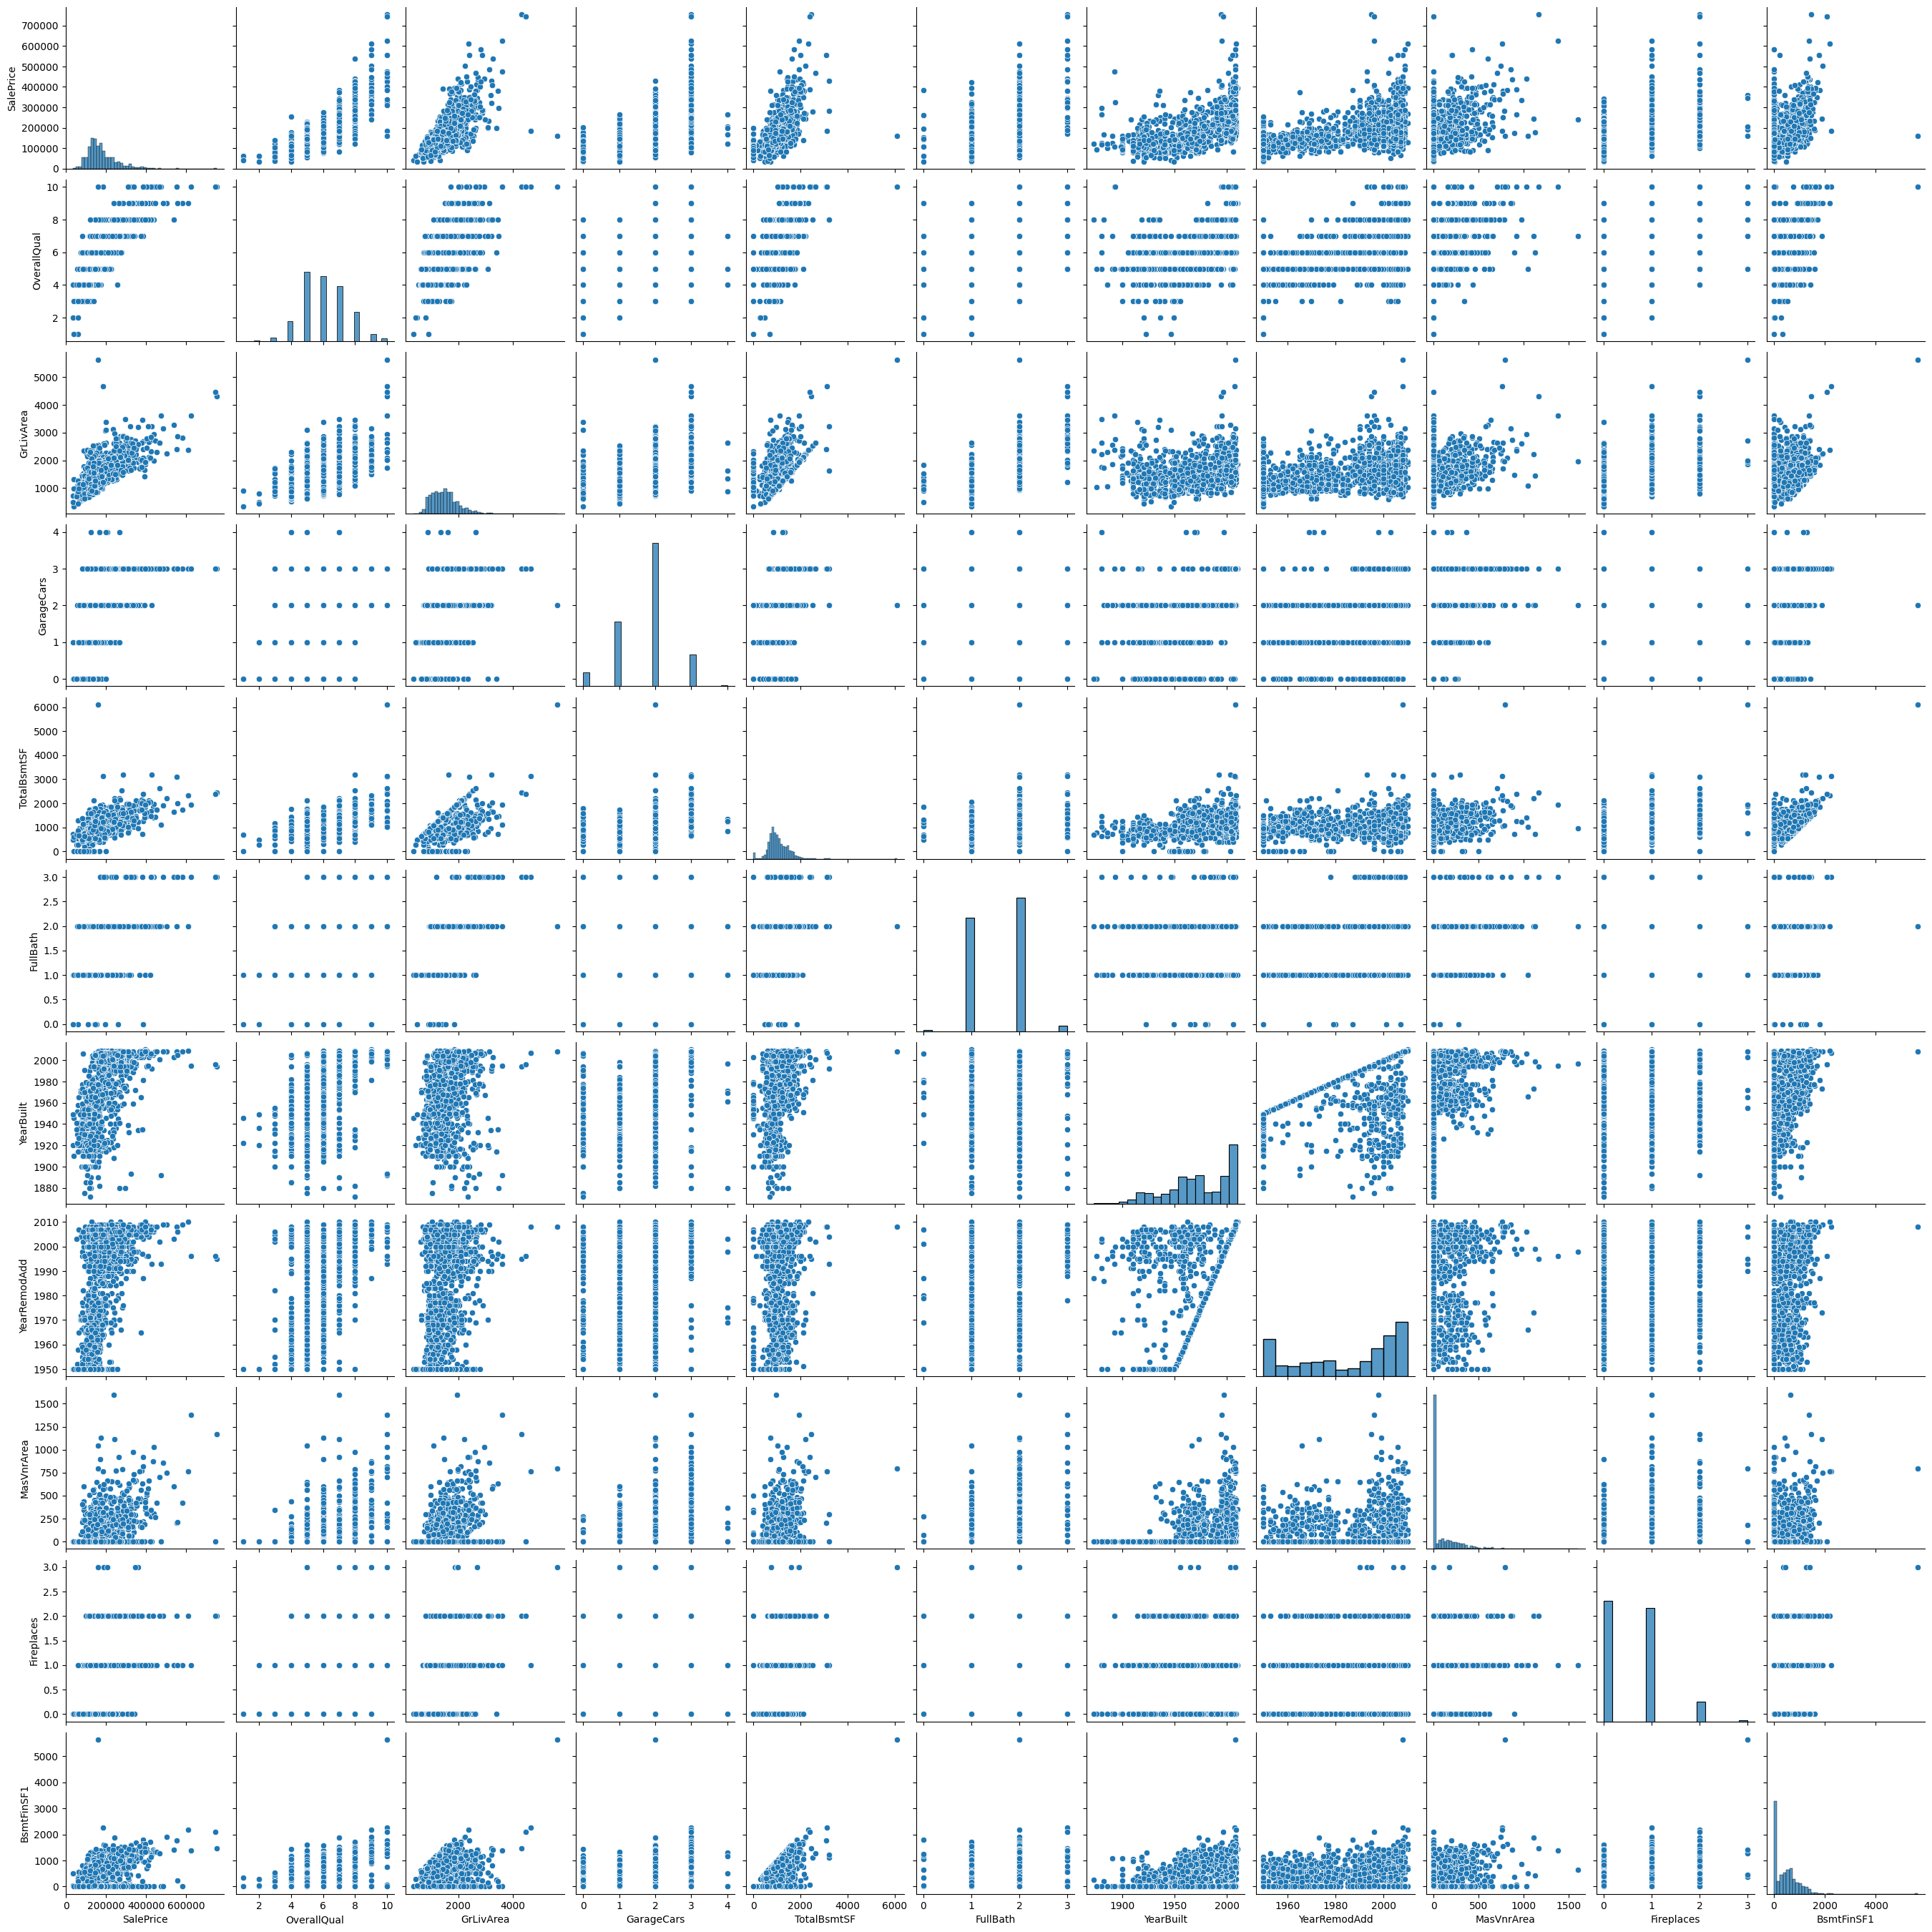

In [52]:
sns.pairplot(data, height=2.5)
plt.show()

In [53]:
df_selected.drop('HalfBath', axis=1, inplace=True)
print(df_selected.head())

   SalePrice  OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
0     208500            7       1710           2          856         2   
1     181500            6       1262           2         1262         2   
2     223500            7       1786           2          920         2   
3     140000            7       1717           3          756         1   
4     250000            8       2198           3         1145         2   

   YearBuilt  YearRemodAdd  MasVnrArea  Fireplaces  BsmtFinSF1  LotFrontage  \
0       2003          2003       196.0           0         706         65.0   
1       1976          1976         0.0           1         978         80.0   
2       2001          2002       162.0           1         486         68.0   
3       1915          1970         0.0           1         216         60.0   
4       2000          2000       350.0           1         655         84.0   

   WoodDeckSF  2ndFlrSF  OpenPorchSF  LotArea  
0           0       854   

In [54]:
encoded = pd.get_dummies(df_selected)
encoded.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,LotArea
0,208500,7,1710,2,856,2,2003,2003,196.0,0,706,65.0,0,854,61,8450
1,181500,6,1262,2,1262,2,1976,1976,0.0,1,978,80.0,298,0,0,9600
2,223500,7,1786,2,920,2,2001,2002,162.0,1,486,68.0,0,866,42,11250
3,140000,7,1717,3,756,1,1915,1970,0.0,1,216,60.0,0,756,35,9550
4,250000,8,2198,3,1145,2,2000,2000,350.0,1,655,84.0,192,1053,84,14260


In [55]:
x= encoded.drop("SalePrice", axis=1)
y= encoded['SalePrice']

In [56]:
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [58]:
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.4, random_state=20)

In [63]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 1883305640.40
Root Mean Squared Error (RMSE): 43397.07
R-squared (R2): 0.73


In [69]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2242986414.18
Root Mean Squared Error (RMSE): 47360.18
R-squared (R2): 0.68


In [77]:
import pickle
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(LR_model, f)
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'
